<a href="https://colab.research.google.com/github/AdnanAli-10/Airbnb-Bookings-Analysis-Capstone-Project./blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## <b>Defining a hypothetical situation</b>
Let us assume that my dad is a wealthy individual and is looking to make some investments in real estate. He has heard from his colleagues that the New York City real estate market has been thriving and makes good enough ROI(return on investment). Being in India, my dad is quite skeptical about investing in New York and leaving the property abandoned, He also wants some cash flow to be generated out of the property every now and then. To get out of this dilemma my dad calls his old friend, Mr Robert Kiyosaki (author of the book Rich Dad Poor Dad), he advices my dad to buy the property and list it on some rental services like <b>"Airbnb"</b>. My dad after listening to his friend comes and asks me <b>"Son, what is Airbnb?"</b>

<b>Defining Airbnb - Airbnb is an online marketplace connecting travelers with local hosts. On one side, the platform enables people to list their available space and earn extra income in the form of rent. On the other, Airbnb enables travelers to book unique homestays from local hosts, saving them money and giving them a chance to interact with locals. Catering to the on-demand travel industry, Airbnb is present in over 190 countries across the world.</b>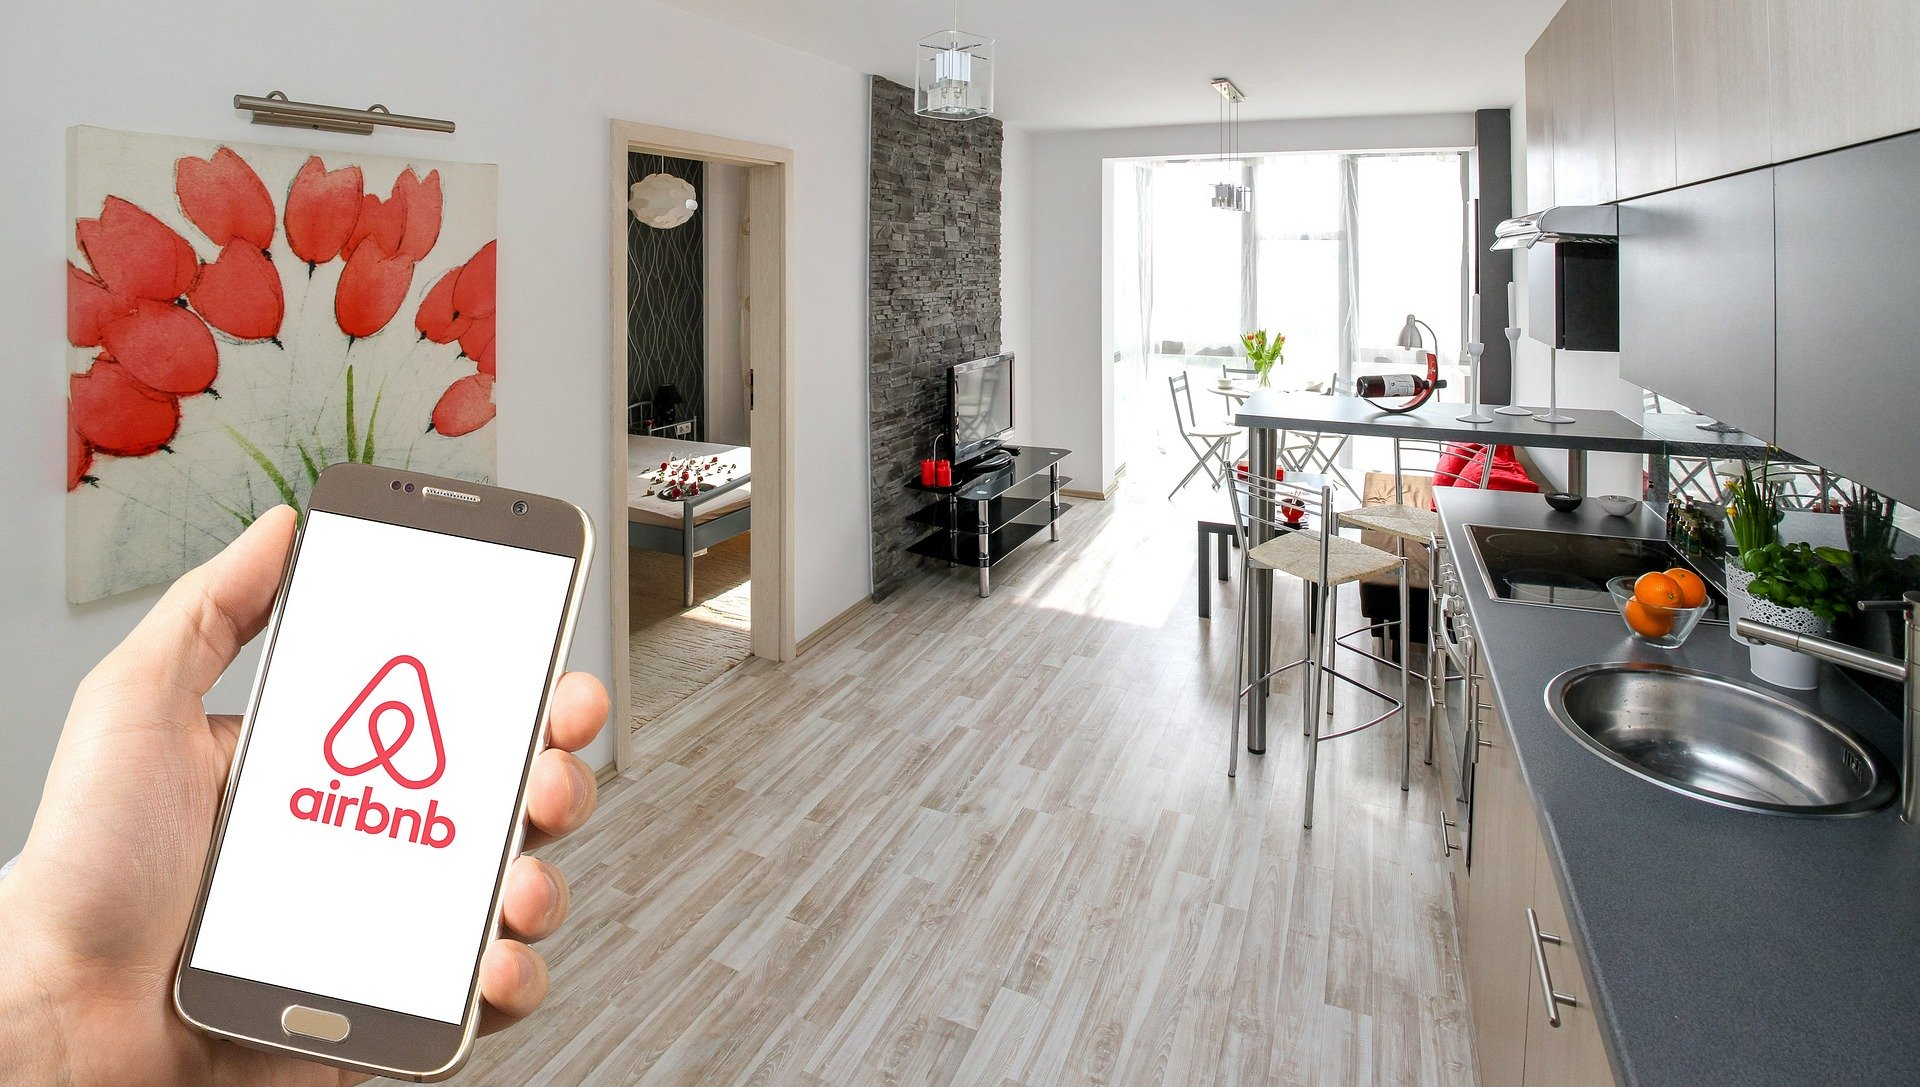

After this professional explanation to my dad, he is quite happy about the opportunity his friend has opened up for him. Now he wants answers to his questions from the business point of view. He asks to me find out a few unique details about the New York Airbnb market, for example:- Which part of New York generates the most revenue, etc. Now, me  being a data scientist I decide to tackle this problem through the art of Data Science and make my Indian parent proud(Probably the most hypothetical thing I've mentioned till now). 

# <b>So lets begin!!!</b>

## <b> Questions to answer:</b>
1. Which hosts are the busiest and why.
2. For which location do the customers pay the highest and lowest rent.
3. Top 5 highest listing areas/locations.
4. What is the average preferred price by the customer.
5. What are the total number of nights spent per location.

Now that we have the questions, it is time to find the answers, but as the great Sherlock Holmes says - "It is a capital mistake to theorize before one has data.", So lets try finding some data.
In this hypothetical world, the organisation I'm working for (AlmaBetter) is kind enough to research and offer me the data required for the analysis. It can also be fetched from kaggle, named - Airbnb-NYC-cleaned by Sandeep Majumdar(The data might be a bit different so the results may vary). 

In [1]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)

In [3]:
#Reading the data in a dataframe using pandas library to perform exploratory analysis
airbnb_df = pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

## <b>Initial EDA and basic operations</b>

In [4]:
#checking the shape of the dataframe
airbnb_df.shape

(48895, 16)

In [5]:
#Checking the first 5 values of the dataframe
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
#Checking the last 5 values of the dataframe
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [7]:
#Checking the columns
col_list = airbnb_df.columns.tolist()
col_list

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [8]:
airbnb_df.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

<b> Defining the columns:</b>
We can see that we have 16 columns and 48,895 observations. To better understand the dataset let's see what each column means.
* id : A unique id given to each airbnb lisitng.
* name : The Ad title for the listing on Airbnb website.
* host_id : A unique id given to an Airbnb host.
* host_name : The name with which the host is registered.
* neighbourhood_group : A group of areas/neighbourhoods.
* neighbourhood : Name of a particular area/ neighbourhood.
* latitude : latitudinal coordinate of the listing.
* longitude : longitudinal coordinate of listing.
* room_type : listing type(1 of 3 types) - 1.Entire Home/apartment, 2.Private room, 3.Shared room.
* price : price of the listing.
* minimum_nights : Minimum number of nights required to stay in a single visit.
* number_of_reviews : The total number of reviews given by visitors.
* last_review : date of the last recorded review.
* reviews_per_month : The number of reviews given per month for a listing.
* calculated_host_listings_count : the total number of listings registered under a given host.
* availability_365 : the number of days for which a listing is available in a year.

In [9]:
#general info about the dataset
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [84]:
#Checking if the dataset has any duplicate values
airbnb_df.duplicated().sum()

0

We can see that there are no duplicate observations, so we can move ahead.

Now I will be removing a few columns (last_review, reviews_per_month, latitude and longitude), because I don't see them adding any value to the questions I have to answer. 

In [10]:
#removing columns
airbnb_df.drop(['latitude','longitude','last_review','reviews_per_month'],axis=1,inplace=True)

In [11]:
#checking for null values
airbnb_df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

<b> Dealing with null values: </b>
There are two ways of dealing with null values, one is deleting the null vlaues and the other is to impute the null values with some meaningfull values.

In this case I will just delete the null values because they are not many and deleting them will not affect the trends much.

In [12]:
#Deleting the observations with null values
airbnb_df.dropna(inplace=True)

In [13]:
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

We can see that there are no more null values left in the dataset.

In [14]:
#Getting a statistical summary of the dataframe
airbnb_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,152.740309,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.232386,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


Here we can see that there are price values which are 0. This doesn't make sense because I don't think so people would put up listing for free. We will impute values for these wrong observations.

In [15]:
airbnb_df[airbnb_df['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,Private room,0,4,1,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,Private room,0,2,55,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,Private room,0,2,16,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,Private room,0,2,12,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,Entire home/apt,0,5,3,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,93,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,Entire home/apt,0,3,0,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,Shared room,0,30,2,6,333


In [16]:
airbnb_df[airbnb_df['price']==0].shape

(11, 12)

So there are 11 observations with price as 0 which need to be treated.
We will achieve this by imputing values based on minimum number of nights and their average price. 

In [17]:
airbnb_df.groupby('minimum_nights')['price'].mean().reset_index()

,minimum_nights,price
0,1,142.062756
1,2,146.279374
2,3,160.285643
3,4,161.229603
4,5,157.263765
...,...,...
103,400,50.000000
104,480,199.000000
105,500,88.800000
106,999,96.000000


In [18]:
#function for imputing average value of price wherever price is 0
def price_imputer(min_nights_list,airbnb_df):
  for i in min_nights_list:
    avg_val = airbnb_df[airbnb_df['minimum_nights']==i].groupby('minimum_nights')['price'].mean().reset_index().loc[0][1]
    airbnb_df['price']=np.where((airbnb_df['price']==0)&(airbnb_df['minimum_nights']==i),avg_val,airbnb_df['price'])

In [19]:
min_nights_list = [1,2,3,4,5,30]
price_imputer(min_nights_list,airbnb_df)

In [20]:
airbnb_df[airbnb_df['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365


We can see that there are no more observations that have the value for price as 0. 

<b>The correlation matrix shows the correlation values, which measure the degree of linear relationship between each pair of variables. The correlation values can fall between -1 and +1. If the two variables tend to increase and decrease together, the correlation value is positive.</b>

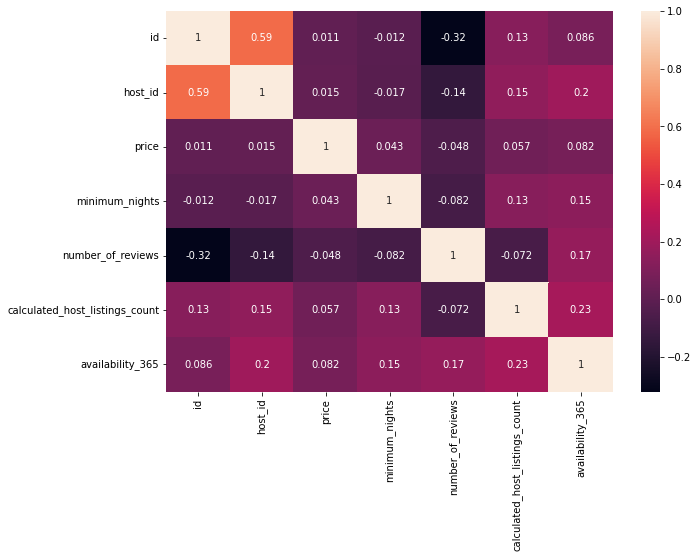

In [21]:
corr_matrix = airbnb_df.corr()       #Creating a correlation matrix
sns.heatmap(corr_matrix,annot=True)  #Using heatmap to represent the correlation
plt.show()                           #Displaying the visualization  

As we can see here that there is no distinctive correlation between any variables(columns) here.

<b>We will be removing id and host_id since it is a unique id representing the lising and the host respectively</b> 

In [22]:
main_cols = set(airbnb_df.columns) - {'id','host_id'}

In [23]:
#Taking numerical columns that add value to visualisations.
num_main_cols = airbnb_df[main_cols].describe().columns.tolist() 

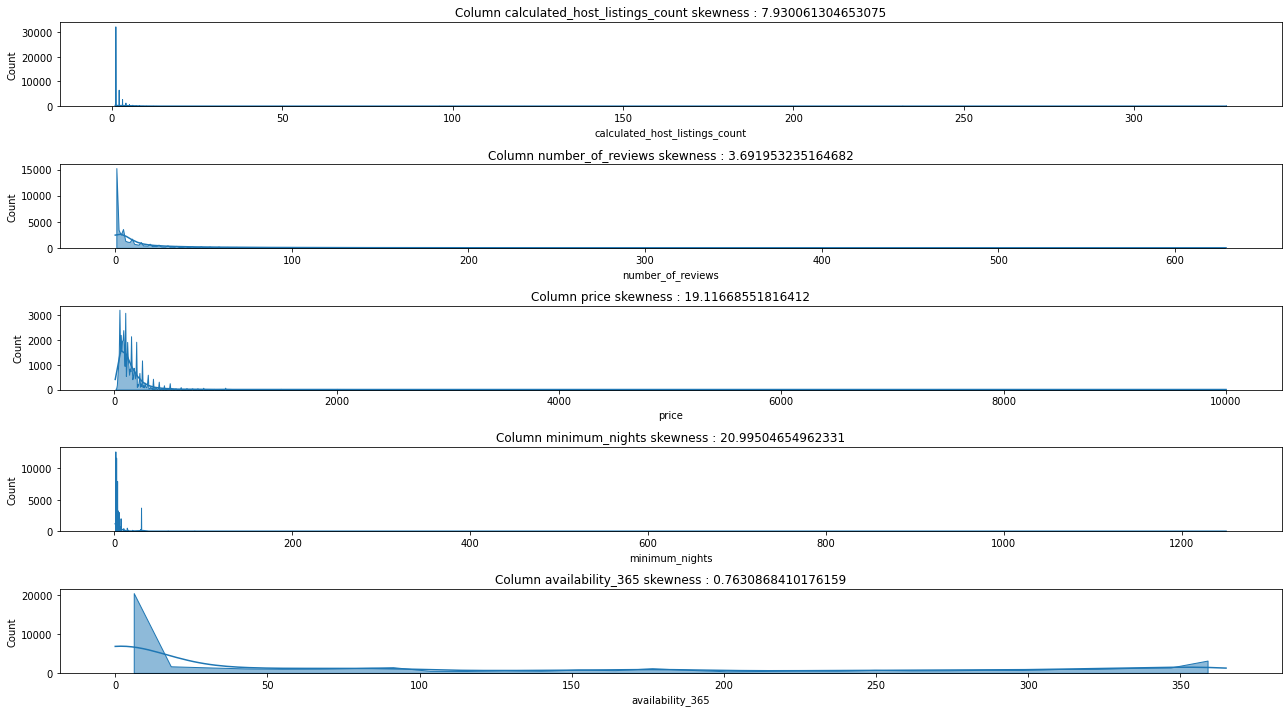

In [24]:
#Plotting important visualizations to see the skewness and distribution of each variable.
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(18, 10))
axes = axes.flatten()
for col, ax in zip(num_main_cols, axes):
    sns.histplot(x=col, data=airbnb_df, ax=ax, kde=True, element='poly')
    ax.set_title(f'Column {col} skewness : {airbnb_df[col].skew()}')

plt.tight_layout(h_pad=1, w_pad=0.8)

<b> Here we can see that all our variables have a positive skewness except availability which is moreover a uniform distribution, this tells us that all kinds of listings are moreover available throughout the year.(We can also see a mild to high rise in count of availability from the end of the year to the start of the year)</b>

## <b>A great hack:</b>
Make your life easy by using Pandas profiling for EDA. This automates the process of exploratory data analysis and gives us the complete picture of the dataframe(with all information about the missing values, duplicate rows, correlation between variables and much more)

In [25]:
#How to use pandas profiling for EDA
# !pip install pandas-profiling==2.7.1
# from pandas_profiling import ProfileReport
# ProfileReport(airbnb_df)

I'll not be using the pandas profiling method for EDA here, because the report it generates takes up a lot of space in the github repo which makes it quite difficult to make sense of, and it also is too long and plain.

<B>NOTE</B>

Using Profilereport may throw an error stating : <b> ImportError: cannot import name 'ABCIndexClass' from 'pandas.core.dtypes.generic'</b>

To solve this problem just go to the boolean.py file and replace ABCIndexclass with ABCIndex

##<b>Question 1: Which hosts are the busiest and why. </b>

<b> ANSWER:</b>

In [74]:
#creating a new busiest hosts dataframe with groupby operations on columns that I think cause a host to be busy.
busiest_hosts = airbnb_df.groupby(['host_id','host_name','room_type','calculated_host_listings_count'])[['price','number_of_reviews','availability_365']].max().reset_index().sort_values(by=['number_of_reviews','price','availability_365'], ascending=False).head()

In [76]:
#Outlook of the busiest hosts dataframe.
busiest_hosts

,host_id,host_name,room_type,calculated_host_listings_count,price,number_of_reviews,availability_365
24474,47621202,Dona,Private room,2,47.0,629,333
7706,4734398,Jj,Private room,3,49.0,607,342
22203,37312959,Maya,Private room,5,46.0,543,175
4589,2369681,Carol,Private room,1,99.0,540,179
19436,26432133,Danielle,Private room,5,54.0,510,347


In [77]:
check_list=['price','number_of_reviews','availability_365']

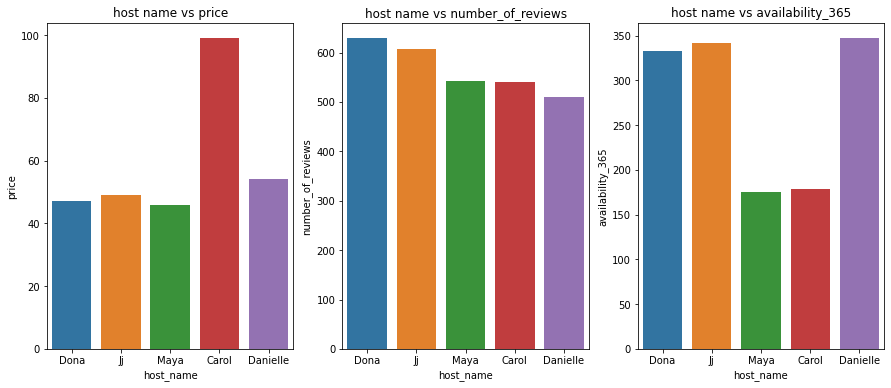

In [79]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(15,6))
axes.flatten()
for col,ax in zip(check_list,axes):
  sns.barplot(data=busiest_hosts,x='host_name',y=col,ax=ax)
  ax.set_title(f'host name vs {col}')

These plots show us that the number of reviews is directly proportional to the popularity of the host. Factors like price and availability also effect the popularity, but the best linear relationship is provided by the number of reviews. 

This analysis shows us that the busiest hosts are(in order):
1. Dona
2. JJ
3. Maya
4. Carol
5. Danielle

All of them have a good mixture of price(around 60 dollars), availability(around half a year) and number of reviews(around 550) which makes them popular.

Another important thing to note is that all of these hosts have private rooms as listings, this could be a very important thing to know while investing money for my dad.

## <b> Question 2: For which location do the customers pay the highest and lowest rent.</b>

<b>ANSWER:</b>

Text(0.5, 1.0, 'Max Price according to location')

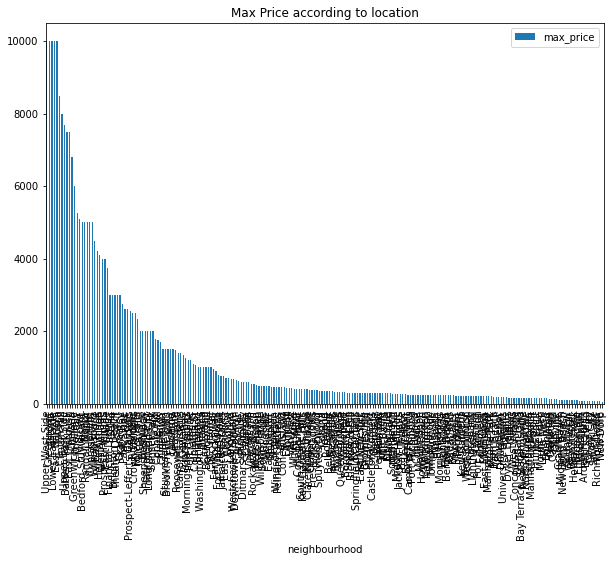

In [30]:
#Obtaining a dataframe that shows us the maximum price for each location.
max_price_per_location = airbnb_df.groupby('neighbourhood')['price'].max().reset_index().sort_values(['price'],ascending=False).rename(columns={'price':'max_price'})
max_price_per_location.plot(x='neighbourhood',y='max_price',kind='bar')
plt.title("Max Price according to location")

This doesn't make much sense so we will just take the top 20 values from this dataframe

Text(0.5, 1.0, 'Max Price according to location')

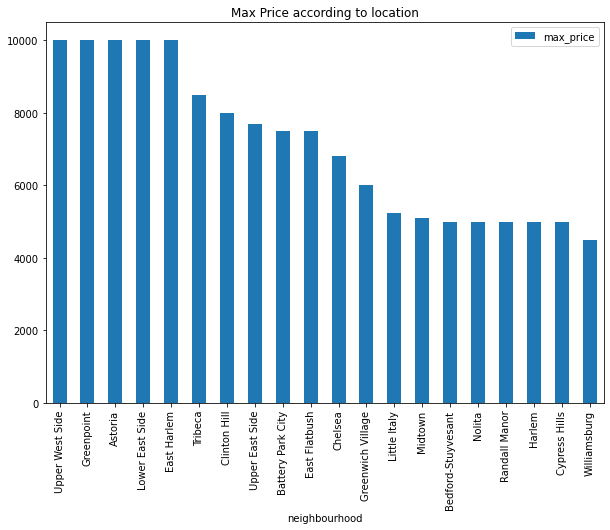

In [31]:
top_max_price = max_price_per_location.head(20)
top_max_price.plot(x='neighbourhood',y='max_price',kind='bar')
plt.title("Max Price according to location")

Text(0.5, 1.0, 'Max Price according to location')

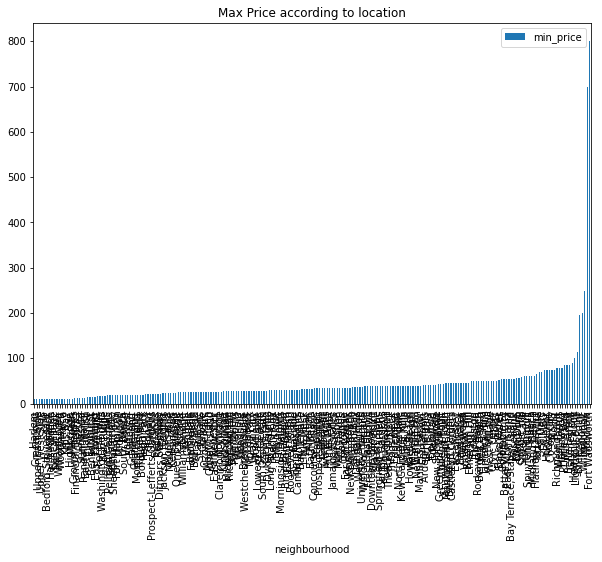

In [32]:
#Obtaining a dataframe that shows us the maximum price for each location.
min_price_per_location = airbnb_df.groupby('neighbourhood')['price'].min().reset_index().sort_values(['price'],ascending=True).rename(columns={'price':'min_price'})
min_price_per_location.plot(x='neighbourhood',y='min_price',kind='bar')
plt.title("Max Price according to location")

Text(0.5, 1.0, 'Max Price according to location')

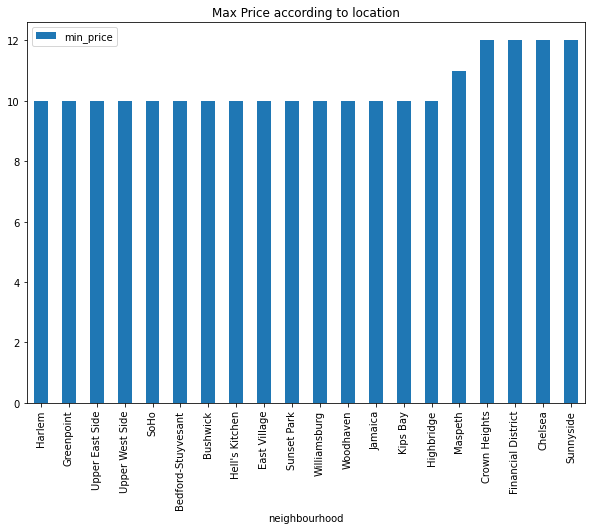

In [33]:
top_min_price = min_price_per_location.head(20)
top_min_price.plot(x='neighbourhood',y='min_price',kind='bar')
plt.title("Max Price according to location")

In [34]:
#Printing the highest 5 rent neighbourhoods
print("The neighbourhoods with the highest rents are:")
for i in range(5): 
  print(i+1,'.', top_max_price.iloc[i]['neighbourhood'],'with a price of:',top_max_price.iloc[i]['max_price'])

The neighbourhoods with the highest rents are:
1 . Upper West Side with a price of: 10000.0
2 . Greenpoint with a price of: 10000.0
3 . Astoria with a price of: 10000.0
4 . Lower East Side with a price of: 9999.0
5 . East Harlem with a price of: 9999.0


In [35]:
#Printing the lowest 5 rent neighbourhoods
print("The neighbourhoods with the lowest rents are:")
for i in range(5): 
  print(i+1,'.', top_min_price.iloc[i]['neighbourhood'],'with a price of:',top_min_price.iloc[i]['min_price'])

The neighbourhoods with the lowest rents are:
1 . Harlem with a price of: 10.0
2 . Greenpoint with a price of: 10.0
3 . Upper East Side with a price of: 10.0
4 . Upper West Side with a price of: 10.0
5 . SoHo with a price of: 10.0


Here we have the highest and lowest rent neighbourhoods. There is a distinct feature observed here, Upper west side and Greenpoint are present in both the lists, this shows that there is high fluctuation of prices in these areas(Maybe it depends on the type of the house or the part of the area it belongs to).

## <b>Question 3: Top 5 highest listing areas/locations.</b>

<b>ANSWER:</b>

In [92]:
#Creating a dataframe with areas having the highest number of listings
highest_listing_areas = airbnb_df.groupby('neighbourhood')['calculated_host_listings_count'].sum().reset_index().sort_values(by='calculated_host_listings_count',ascending=False).head(10)

In [94]:
#A glimpse of what the dataframe with locations which have highest listings looks like
highest_listing_areas

,neighbourhood,calculated_host_listings_count
73,Financial District,85454
137,Murray Hill,26125
95,Hell's Kitchen,25159
127,Midtown,25019
191,Theater District,18704
34,Chelsea,18097
201,Upper East Side,16281
202,Upper West Side,13357
13,Bedford-Stuyvesant,9687
197,Tribeca,7606


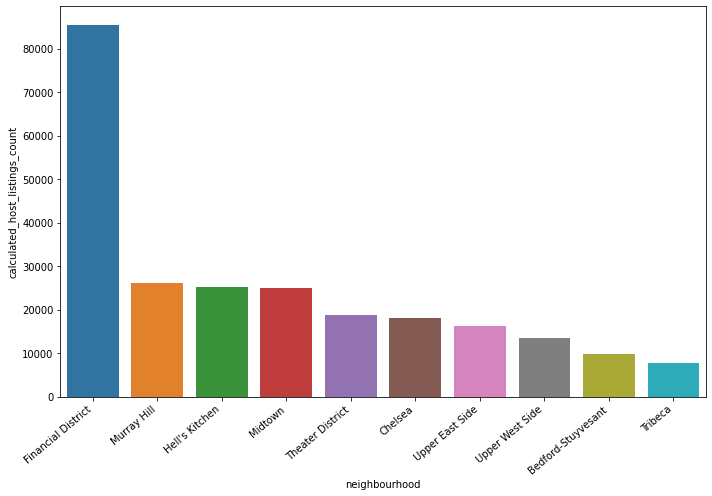

In [101]:
ax = sns.barplot(data=highest_listing_areas,x='neighbourhood',y='calculated_host_listings_count')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [102]:
#Printing the top 5 highest listing areas
print("The top 5 highest listed areas are:")
for i in range(5): 
  print(i+1,'.', highest_listing_areas.iloc[i]['neighbourhood'],'with ',highest_listing_areas.iloc[i]['calculated_host_listings_count'],' number of listings')

The top 5 highest listed areas are:
1 . Financial District with  85454  number of listings
2 . Murray Hill with  26125  number of listings
3 . Hell's Kitchen with  25159  number of listings
4 . Midtown with  25019  number of listings
5 . Theater District with  18704  number of listings


Therefore with some straight forward groupby operations we easily have the top 5 areas with the highest number of listings.

<b> Question 4: What is the average preferred price by the customer.</b>

<b> ANSWER:</b>